# Podstawy sztucznej inteligencji, projekt na podstawie dataset: Spotify Top 100 Songs of 2010-2019 
https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification


In [64]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Opis kolumn

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [67]:
data.shape

(5110, 12)

In [68]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [69]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


## Dotychczasowe wnioskski:
- nie kategoryczne dane: gender, ever_married, work_type, Residence_type, smoking_status
- 12 kolumn i 5110 wierszy
- BMI ma najwięcej (201) brakujących wartości
- stroke - dostępny tylko dla zestawu train


# Przygotowanie danych

In [70]:
data.drop('id', axis =1, inplace=True)
data = data.reset_index(drop = True)

Sprawdzam czy w tabeli pojawiająś się wartości NaN

In [71]:
def unique_col_counts(df, columns):
  for i in range(len(columns)):
    print(df[columns[i]].value_counts(),"\n")

columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
unique_col_counts(data, columns)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

0    4612
1     498
Name: hypertension, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



Opuszczam kolumnę z płcia Other, gdyż pojawia się tylko raz

In [72]:
data.drop(data.index[data['gender'] == 'Other'], inplace=True)
data = data.reset_index(drop = True)

Szukam wartośći odstających w kategoriach, które mają ciągłe dane numeryczne, czyli age, bmi, avg_glucose_level

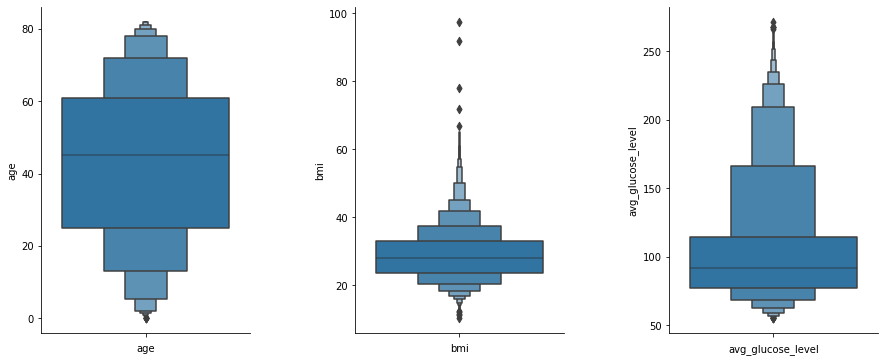

In [73]:
cols = ['age','bmi','avg_glucose_level']
fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)
for i in range(len(cols)):
  (sns.boxenplot(y=data[cols[i]],data=data, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

# Adjust space between subplots
fig.subplots_adjust(wspace=0.5)
sns.despine()

Bmi ma wartości odstające >70, zostaną one usunięte

In [74]:
data.drop(data.index[data['bmi'] > 70], inplace=True)

data = data.reset_index(drop = True)

Zmienimy teraz dane niekategoryczne na kategoryczne zero-jedynkowe.

In [75]:
new_work_type ={'Private' : 1,
                 'Self-employed' : 1,
                 'children': 0, #zakładam że opiekuje sie dziećmi
                 'Govt_job' : 1,
                 'Never_worked' : 0
                }
data['work_type'].replace(new_work_type, inplace = True)

new_smoking_status ={'smokes' : 1,
                      'never smoked' : 0,
                      'Unknown' : 0,
                      'formerly smoked': 0
                     }

data['smoking_status'].replace(new_smoking_status, inplace = True)

columns = ['work_type','smoking_status']
unique_col_counts(data, columns)

1    4396
0     709
Name: work_type, dtype: int64 

0    4317
1     788
Name: smoking_status, dtype: int64 



In [76]:
data.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [77]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())


BMI 	Weight | Status
| --- | --- |
Below 18.5	| Niedowaga
18.5—24.9 |	Zdrowy
25.0—29.9 |	Nadwaga
30.0 and Above |	Otyłość

In [78]:
data['bmi'] = pd.cut(x=data['bmi'], bins=[0,18.4,24.9,29.9,100],
                     labels=['Underweight','Healthy','Overweight', 'Obese'])

# Analiza danych

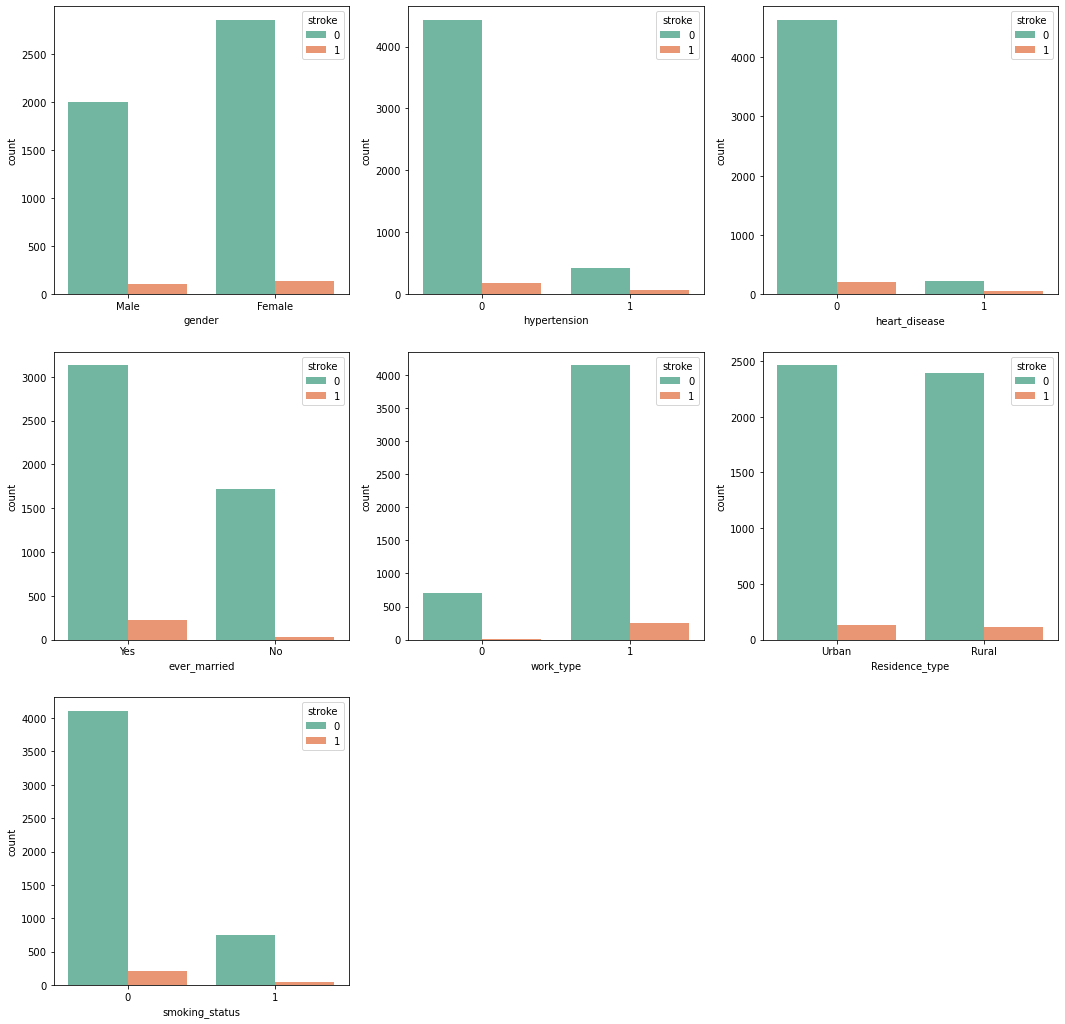

In [79]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 18))
fig.delaxes( ax=axes[2,1])
fig.delaxes( ax=axes[2,2])
sns.countplot(x="gender", hue='stroke', palette='Set2', data=data , ax=axes[0,0])
sns.countplot(x="hypertension", hue='stroke', palette="Set2", data=data , ax=axes[0,1])
sns.countplot(x="heart_disease", hue='stroke', palette="Set2", data=data , ax=axes[0,2])
sns.countplot(x="ever_married", hue='stroke', palette="Set2", data=data , ax=axes[1,0])
sns.countplot(x="work_type", hue='stroke', palette="Set2", data=data , ax=axes[1,1])
sns.countplot(x="Residence_type", hue='stroke', palette="Set2", data=data , ax=axes[1,2])
sns.countplot(x="smoking_status", hue='stroke', palette="Set2", data=data , ax=axes[2,0])
plt.show()

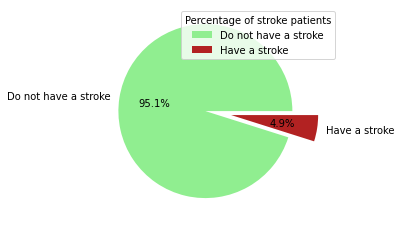

In [80]:
dt_target_recoured=data['stroke'].astype('int32')
dt_target_recoured.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(dt_target_recoured.value_counts() , labels = ['Do not have a stroke' , 'Have a stroke'] , autopct='%1.1f%%', 
        colors=['lightgreen','firebrick'] , explode=(0.3,0) )

plt.legend(title = "Percentage of stroke patients" )
plt.show() 

In [81]:
print("Pacjenci z cukrzycą", "" , round(data[data["avg_glucose_level"]>=150].shape[0]*100/data.shape[0],2),"%")
print("Zdrowi pacjenci"  ,"  ", round(data[data["avg_glucose_level"]<150].shape[0]*100/data.shape[0],2),"%")

Pacjenci z cukrzycą  14.3 %
Zdrowi pacjenci    85.7 %


<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

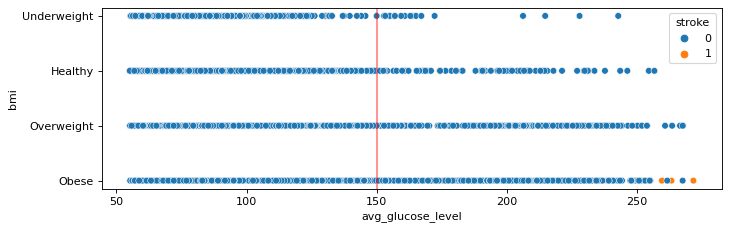

In [89]:
plt.figure(figsize=(10, 3), dpi=80)
plt.axvspan(149.9, 150, color='red', alpha=0.3)
sns.scatterplot(data=data,y=data['bmi'],x=data['avg_glucose_level'],hue=data['stroke'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

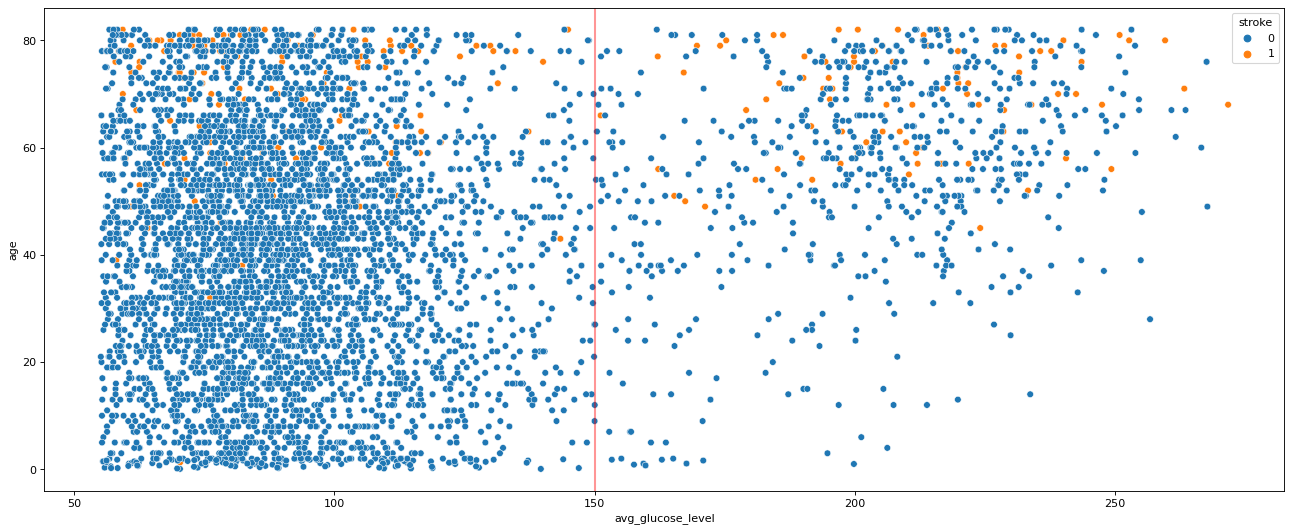

In [83]:
plt.figure(figsize=(20, 8), dpi=80)
plt.axvspan(149.9, 150, color='red', alpha=0.3)
sns.scatterplot(data=data,y=data['age'],x=data['avg_glucose_level'],hue=data['stroke'])


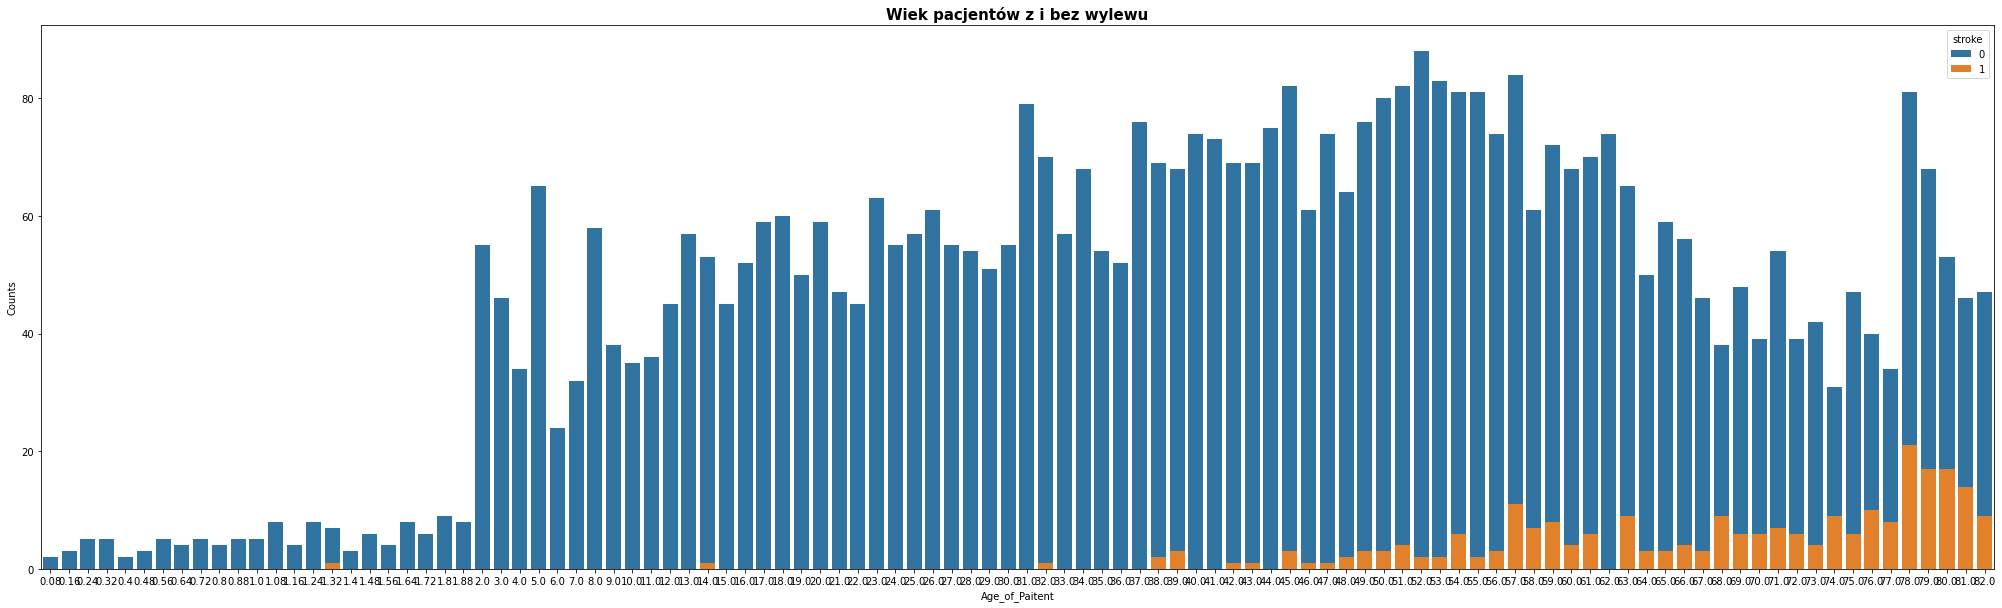

In [90]:
plt.figure(figsize=[35,10])
sns.countplot(data=data.sort_values('age'),x='age',hue='stroke',dodge=False);
plt.title('Wiek pacjentów z i bez wylewu' , fontsize = 15, fontweight ='bold');
plt.xlabel('Age_of_Paitent')
plt.ylabel('Counts')
plt.show()

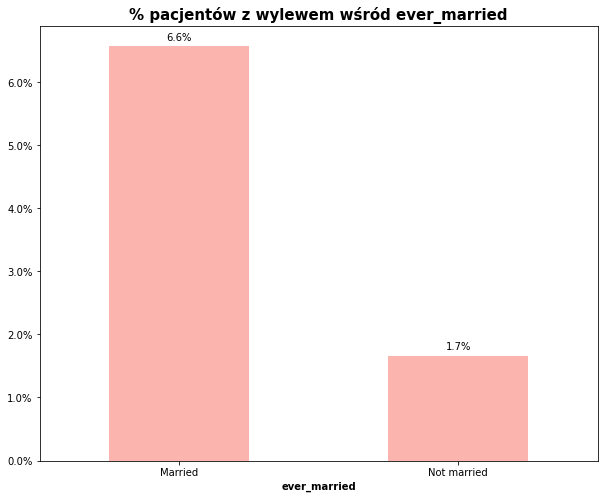

In [141]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])
x_labels=["Married","Not married"]
(100*dt1['ever_married'].value_counts()/data['ever_married'].value_counts()).plot(kind='bar' , stacked=True , colormap='Pastel1' ).set_xticklabels(x_labels)
plt.title("% pacjentów z wylewem wśród ever_married" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt1['ever_married'].value_counts()/data['ever_married'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('ever_married' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

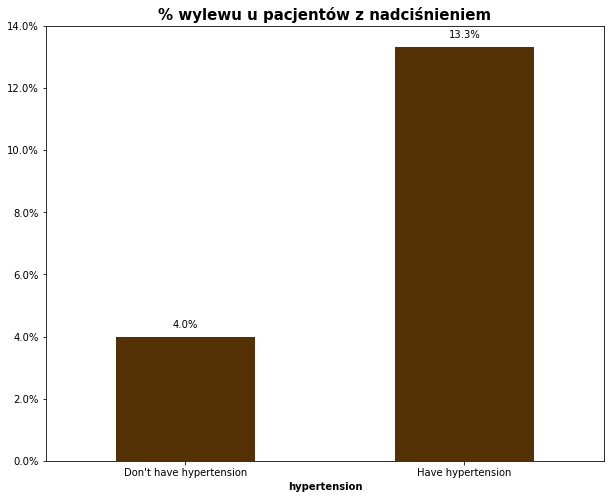

In [93]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])
dt1=data[data["stroke"].isin([1])]
x_labels=["Don't have hypertension","Have hypertension"]
(100*dt1['hypertension'].value_counts()/data['hypertension'].value_counts()).plot(kind='bar' , stacked=True , colormap='BrBG' ).set_xticklabels(x_labels)
plt.title("% wylewu u pacjentów z nadciśnieniem" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt1['hypertension'].value_counts()/data['hypertension'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.3,strt,ha='center')

plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('hypertension' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

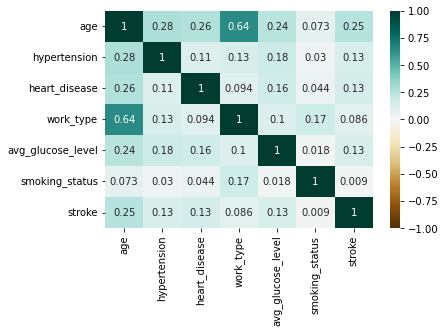

In [87]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [123]:
df= pd.get_dummies(data)
y = df
x=df.drop('stroke', axis=1)

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

# Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test, y_test)
print("Logistic regression Accuracy score is:", acc)

Logistic regression Accuracy score is: 0.9471106758080313


c:\Users\annam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVC

In [137]:
from sklearn.svm import SVC
svc = SVC(random_state = 123)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
acc = svc.score(x_test, y_test)
print("SVC Accuracy score is:", acc)
cm = confusion_matrix(y_test, svc_pred)

SVC Accuracy score is: 0.9461312438785504


# Decision tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
acc = dt.score(x_test, y_test)
print("Decision tree Accuracy score is:", acc)

Decision tree Accuracy score is: 0.9098922624877571


# Random forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=0)
rf.fit(x_train, y_train)
predict = rf.predict(x_test)
score = accuracy_score(predict, y_test)
print(rf.__class__.__name__[:30])
print('Accuracy: ' + str(np.round(score * 100, 2)) + '%')



RandomForestClassifier
Accuracy: 93.73%


In [ ]:
history_conv_max_2 = History()
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:],padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(n_classes,activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25,epochs=100,callbacks=[early_stopping, history_conv_max_2])
model.evaluate(X_test,y_test)